In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import sys
sys.path.append("../src")

from curve import DiscountCurve

In [2]:
df = pd.read_csv("../data/curvaDI_20251122.csv", sep=";", encoding="latin1")

df.columns = df.iloc[3] 
df = df.drop(df.index[:4])   
df = df.iloc[:73]           
df = df.reset_index(drop=True)
df.iloc[:, 2] = df.iloc[:, 2].str.replace(',', '.', regex=False).astype(float)
df = df[["Vertices", "ETTJ PREF"]]

In [3]:
vertices_clean = (
    df["Vertices"]
    .astype(str)
    .str.replace(".", "", regex=False)   
    .str.replace(",", "", regex=False)  
)

df["days"] = pd.to_numeric(vertices_clean, errors="coerce")
df["rate"] = pd.to_numeric(df["ETTJ PREF"], errors="coerce") / 100.0
df = df.dropna(subset=["days", "rate"]).reset_index(drop=True)
df["year_frac"] = df["days"] / 252
df["discount_factor"] = np.exp(-df["rate"] * df["year_frac"])

In [4]:
df

3,Vertices,ETTJ PREF,days,rate,year_frac,discount_factor
0,252,13.7401,252.0,0.137401,1.0,0.871621
1,378,13.2431,378.0,0.132431,1.5,0.819840
2,504,12.9998,504.0,0.129998,2.0,0.771055
3,630,12.9318,630.0,0.129318,2.5,0.723760
4,756,12.9675,756.0,0.129675,3.0,0.677717
5,882,13.0571,882.0,0.130571,3.5,0.633181
6,1.008,13.1697,1008.0,0.131697,4.0,0.590499
7,1.134,13.2867,1134.0,0.132867,4.5,0.549965
8,1.260,13.3973,1260.0,0.133973,5.0,0.511778
9,1.386,13.4958,1386.0,0.134958,5.5,0.476033


In [5]:
curve = DiscountCurve(df)
df_value = curve.discount_factor(10)
print(df_value)

r_cont = curve.zero_rate_continuous(100)
print(r_cont)

price_zero_cupon = curve.price_zero_coupon(50, 300)
print(price_zero_cupon)

0.8716206361689026
0.34625052
42.57598604125605


0.8716206361689026
0.34625052
42.57598604125605
909.7565901744101


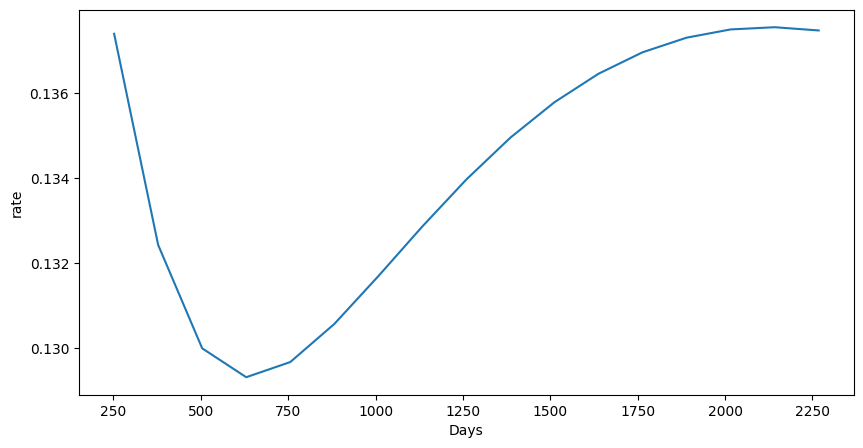

In [8]:
curve = DiscountCurve(df)  # df is your curva DI DataFrame

# 1) Discount factor & zero rate
# 2) Zero-coupon price
# 3) Fixed-rate bond price (3y, 10% coupon, annual)
# 4) Zero curve plot

print(curve.discount_factor(10))
print(curve.zero_rate_continuous(100))
print(curve.price_zero_coupon(50, 300))

price_bond = curve.price_fixed_rate_bond(
    face_value=1000,
    coupon_rate=0.10,
    years=3,
    payments_per_year=1
)
print(price_bond)

nodes = curve.zero_curve_nodes()
plt.figure(figsize=(10, 5))
plt.plot(nodes["days"], nodes["zero_rate_cont"])
plt.xlabel("Days")
plt.ylabel("rate")
plt.show()